In [2]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt


In [3]:
img_grey = cv2.imread('lena.jpg',0)
cv2.imshow('lena',img_grey)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [4]:
print(img_grey)

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


In [5]:
print(img_grey.dtype)

uint8


In [6]:
print(img_grey.shape)

(512, 512)


In [7]:
img = cv2.imread("lena.jpg")
cv2.imshow('lena',img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [8]:
img_crop = img[:100,:200]
cv2.imshow('lena_crop',img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [9]:
B,G,R = cv2.split(img)
cv2.imshow('B',B)
cv2.imshow('R',R)
cv2.imshow('G',G)
cv2.imshow('lena',img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [10]:
def random_light_color(img):
    B,G,R = cv2.split(img)
    for B_ in [B,G,R]:
        b_rand = random.randint(-50,50)
        if b_rand == 0:
            pass
        elif b_rand > 0:
            lim = 255 - b_rand
            B_[B_>lim] = 255
            B_[B_<=lim] = (b_rand+B_[B_<=lim]).astype(img.dtype)
        elif b_rand < 0:
            lim = 0-b_rand
            B_[B_<lim] = 0
            B_[B_>=lim] = (b_rand + B_[B_>=lim]).astype(img.dtype)
    img_merge = cv2.merge((B,G,R))
    return img_merge

In [11]:
chage_color = random_light_color(img)
cv2.imshow('lena_color',chage_color)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [12]:
def adjust_gamma(image,gamma=1.0):
    invGamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i/255.0) ** invGamma)*255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image,table)

In [13]:
img_brighter = adjust_gamma(img,2)

In [14]:
cv2.imshow("img",img)
cv2.imshow("img_brighter",img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

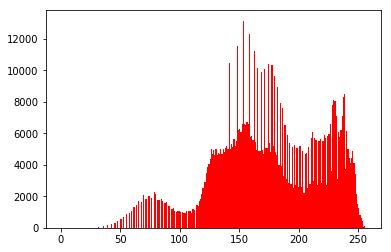

In [15]:
#histogram
img_small_brighter = cv2.resize(img_brighter,(int(img_brighter.shape[0]*0.5),int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(),256,[0,256],color='r')
img_yuv = cv2.cvtColor(img_small_brighter,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YCR_CB2BGR)
cv2.imshow('color input image',img_small_brighter)
cv2.imshow('Histogram equalized',img_output)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [22]:
#rotation
M = cv2.getRotationMatrix2D((img.shape[1] / 2 ,img.shape[0] / 2),30,1)
img_rotate = cv2.warpAffine(img,M,(int(img.shape[1]),img.shape[0]))
cv2.imshow('rotated lena',img_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [23]:
img_rotate2 = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('rotated lena',img_rotate2)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [24]:
M = cv2.getRotationMatrix2D((img.shape[1] / 2 ,img.shape[0] / 2),30,0.5)
img_rotate = cv2.warpAffine(img,M,(int(img.shape[1]),img.shape[0]))
cv2.imshow('rotated lena',img_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [27]:
#Affine Transform
rows,cols,ch = img.shape
pts1 = np.float32([[0,0],[cols-1,0],[0,rows-1]])
pts2 = np.float32([[cols *0.2,rows*0.1],[cols*0.9,rows*0.2],[cols*0.1,rows*0.9]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow("affine lena",dst)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [30]:
def random_wrap(img,row,col):
    height,width,channels = img.shape
    
    #wrap:
    random_margin = 60
    x1 = random.randint(-random_margin,random_margin)
    y1 = random.randint(-random_margin,random_margin)
    x2 = random.randint(width-random_margin-1,width -1)
    y2 = random.randint(-random_margin,random_margin)
    x3 = random.randint(width-random_margin-1,width -1)
    y3 = random.randint(height-random_margin-1,height -1)
    x4 = random.randint(-random_margin,random_margin)
    y4 = random.randint(height-random_margin-1,height -1)
    
    dx1 = random.randint(-random_margin,random_margin)
    dy1 = random.randint(-random_margin,random_margin)
    dx2 = random.randint(width-random_margin-1,width -1)
    dy2 = random.randint(-random_margin,random_margin)
    dx3 = random.randint(width-random_margin-1,width -1)
    dy3 = random.randint(height-random_margin-1,height -1)
    dx4 = random.randint(-random_margin,random_margin)
    dy4 = random.randint(height-random_margin-1,height -1)
    
    pts1 = np.float32([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])
    pts2 = np.float32([[dx1,dy1],[dx2,dy2],[dx3,dy3],[dx4,dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1,pts2)
    img_warp = cv2.warpPerspective(img,M_warp,(width,height))
    return M_warp,img_warp
M_warp,img_warp = random_wrap(img,img.shape[0],img.shape[1])
cv2.imshow('lena_wrap',img_warp)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()